In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('diabetes.csv')

In [2]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.drop(['SkinThickness', 'DiabetesPedigreeFunction'], axis=1, inplace=True)

In [7]:
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

df['BMI_Category'] = df['BMI'].apply(categorize_bmi)

# Encode the 'BMI_Category' column
label_encoder = LabelEncoder()
df['BMI_Category'] = label_encoder.fit_transform(df['BMI_Category'])

In [9]:
X = df.drop('Outcome', axis=1)
y = df['Outcome'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the logistic regression model
log_reg = LogisticRegression()

# Define hyperparameters to tune
params = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'solver': ['liblinear', 'lbfgs', 'newton-cg'],  # Optimization algorithm
    'max_iter': [100, 200, 300]  # Maximum number of iterations
}

# Perform GridSearchCV
log_reg_grid = GridSearchCV(log_reg, params, cv=5)
log_reg_grid.fit(X_train, y_train)

# Get the best parameters and score
best_params_lr = log_reg_grid.best_params_
best_score_lr = log_reg_grid.best_score_

print("Best Parameters for Logistic Regression:", best_params_lr)
print("Best Score for Logistic Regression:", best_score_lr)

Best Parameters for Logistic Regression: {'C': 0.01, 'max_iter': 100, 'solver': 'lbfgs'}
Best Score for Logistic Regression: 0.7720111955217913


In [11]:
from sklearn.ensemble import RandomForestClassifier

# Define the random forest classifier model
rf_classifier = RandomForestClassifier()

# Define hyperparameters to tune
params_rf = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum samples required at each leaf node
}

# Perform GridSearchCV
rf_grid = GridSearchCV(rf_classifier, params_rf, cv=5)
rf_grid.fit(X_train, y_train)

# Get the best parameters and score
best_params_rf = rf_grid.best_params_
best_score_rf = rf_grid.best_score_

print("Best Parameters for Random Forest Classifier:", best_params_rf)
print("Best Score for Random Forest Classifier:", best_score_rf)

Best Parameters for Random Forest Classifier: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Best Score for Random Forest Classifier: 0.7850593096094897


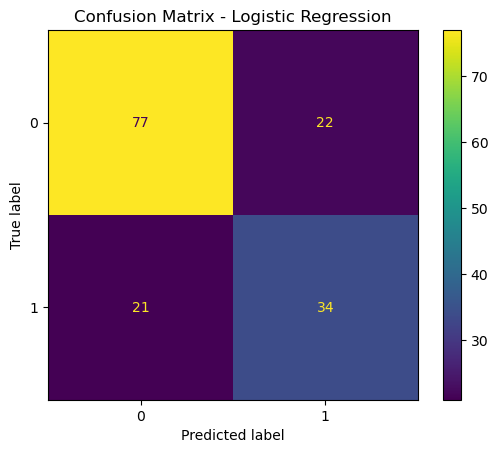

Confusion Matrix - Logistic Regression:
[[77 22]
 [21 34]]


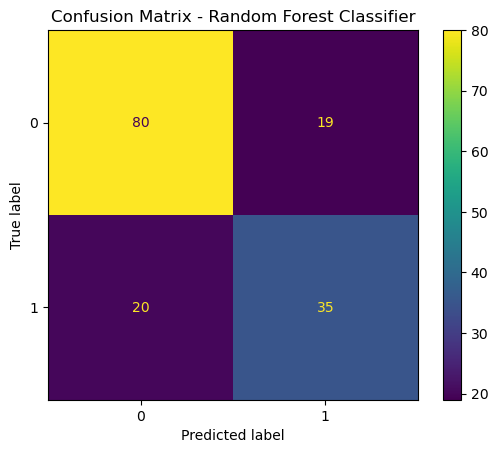

Confusion Matrix - Random Forest Classifier:
[[80 19]
 [20 35]]


In [12]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt

# Get the best logistic regression model
best_lr_model = log_reg_grid.best_estimator_

# Predict using the best logistic regression model
y_pred_lr = best_lr_model.predict(X_test)

# Generate the confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Plot the confusion matrix
plot_confusion_matrix(best_lr_model, X_test, y_test)
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

print("Confusion Matrix - Logistic Regression:")
print(cm_lr)


# Get the best random forest classifier model
best_rf_model = rf_grid.best_estimator_

# Predict using the best random forest classifier model
y_pred_rf = best_rf_model.predict(X_test)

# Generate the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix
plot_confusion_matrix(best_rf_model, X_test, y_test)
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()

print("Confusion Matrix - Random Forest Classifier:")
print(cm_rf)